In [20]:
!ls

Bass_Plot.png       Old_Plot.png        hw_2.key            hw_2_data
Homwork_2.ipynb     Testing             hw_2_assignment.pdf


# Part a

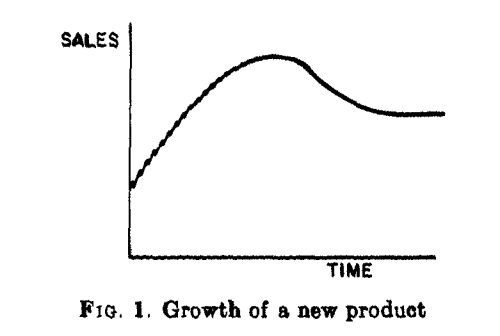

In [22]:
# Critique
from IPython.display import Image
Image("Bass_Plot.png")

# Critique:

This figure was taken from the paper "New Product Growth for Model Consumer Durables. Management Science 15(5) 215.*"
The main complaint I have is that the units are not specified but to a certain extend the graph is only illustrate the idea that adoption of new products are slow in the beginning, peak at some point, before dropping to a long run average in sales.

# Recreating a plot from my own publication
I am using an old plot from my undergraduate thesis published as: 
* K. Li, C. Gibson, D. Ho, Q. Zhou, J. Kim, O. Buhisi, D. Brown,
and M. Gerber, “Assessment of machine learning algorithms in cloud
computing frameworks,” in Systems and Information Engineering
Design Symposium (SIEDS), 2013 IEEE, Apr 2013, pp. 98–103.
* The origianl graph is as follows:

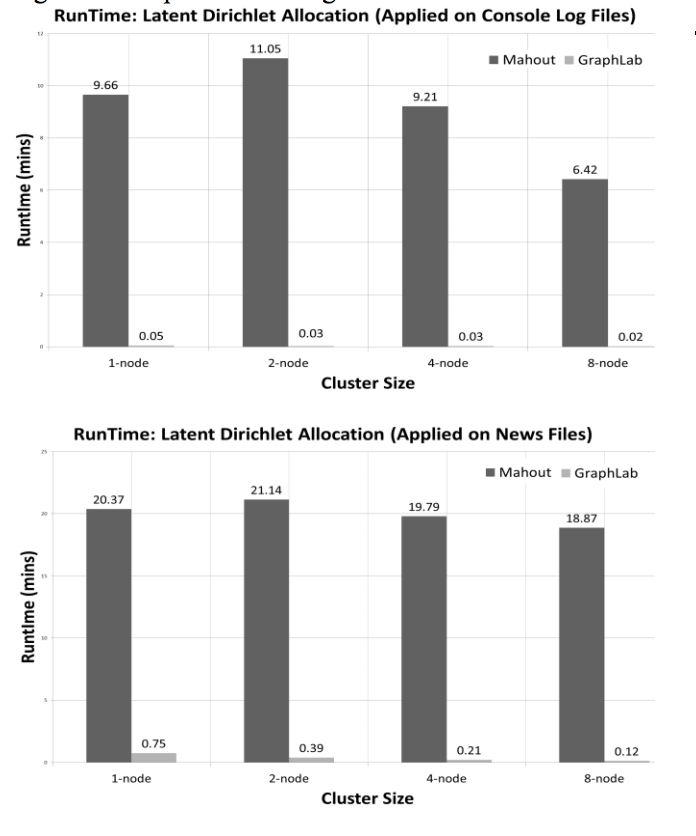

In [23]:
from IPython.display import Image
Image("Old_Plot.png")

We will reproduce the top graph in Bokeh and make it better :)

In [48]:
mahout = np.array([20.37, 21.14, 19.79, 18.87])
gl = [0.75, 0.39, 0.21, 0.12]
mdf = np.array([mahout, gl]).T
mdf.shape
print(mdf)

[[ 20.37   0.75]
 [ 21.14   0.39]
 [ 19.79   0.21]
 [ 18.87   0.12]]


In [86]:
df = pd.DataFrame(mdf, columns=['mahout', 'gl'], index=['1-node', '2-node', '3-node', '4-node'])
df

,mahout,gl
1-node,20.37,0.75
2-node,21.14,0.39
3-node,19.79,0.21
4-node,18.87,0.12


In [53]:
from bokeh.charts import BoxPlot, output_file, show

In [87]:
df['mahout'][0]

20.370000000000001

In [91]:
df['mahout'][1]

21.140000000000001

In [130]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import FixedTicker

plot = figure(width=600, height=600, x_range=(0,5), y_range=(-5,30))

plot.quad(top=[df['mahout'][0]],bottom=[0],left=[0.5],right=[1], color='green', line_color='black', legend='mahout')
#plot.quad(top=[df['mahout'][1]],bottom=[0],left=[3],right=[4], color='green', line_color='black', legend='mahout)
plot.quad(top=[df['mahout'][1]],bottom=[0],left=[1.5],right=[2], color='green', line_color='black', legend='mahout')
plot.quad(top=[df['mahout'][2]],bottom=[0],left=[2.5],right=[3], color='green', line_color='black', legend='mahout')
plot.quad(top=[df['mahout'][3]],bottom=[0],left=[3.5],right=[4], color='green', line_color='black', legend='mahout')

plot.quad(top=[df['gl'][0]],bottom=[0],left=[1],right=[1.5], color='red', line_color='black', legend='gl')
plot.quad(top=[df['gl'][1]],bottom=[0],left=[2],right=[2.5], color='red', line_color='black', legend='gl')
plot.quad(top=[df['gl'][2]],bottom=[0],left=[3],right=[3.5], color='red', line_color='black', legend='gl')
plot.quad(top=[df['gl'][3]],bottom=[0],left=[4],right=[4.5], color='red', line_color='black', legend='gl')

plot.title.text = "Run Time Latent Dirichlet Allocation (Applied on News Data)"
plot.xaxis.axis_label = "Cluster Size (# of nodes)"
plot.xaxis.minor_tick_in = 1
plot.xaxis.minor_tick_in = 4
#p.xaxis.bounds = (1, 4)
plot.xaxis[0].ticker=FixedTicker(ticks=[1, 2, 3, 4])
plot.yaxis.axis_label = "Run Time (Wall Time)"

output_file('test.html')
show(plot)

# Part b

In [40]:
!ls hw_2_data/

flowers.csv     google_data.txt ny_temps.txt    stocks.png      yahoo_data.txt


In [146]:
%matplotlib inline

In [147]:
import numpy as np
import matplotlib.pyplot as plt

In [148]:
!head hw_2_data/ny_temps.txt

Modified Julian Date	Max Temperature
48988	53
49019	38
49047	31
49078	66
49108	75
49139	65
49169	79
49200	82
49231	83


In [149]:
!head hw_2_data/yahoo_data.txt

Modified Julian Date	Stock Value
55463	14.5
55462	14.17
55461	14.04
55460	14.18
55459	13.86
55456	13.89
55455	14.19
55454	14.27
55453	13.63


In [150]:
# Loading all data
yahoo_data = np.loadtxt("hw_2_data/yahoo_data.txt", skiprows=1, dtype=([("date", "i8"), ("stock_value", "f8")]))
google_data = np.loadtxt("hw_2_data/google_data.txt", skiprows=1, dtype=([("date", "i8"), ("stock_value", "f8")]))
ny_temps = np.loadtxt("hw_2_data/ny_temps.txt", skiprows=1, dtype=np.dtype([("date", "i8"), ("max_temp", "i8")]))

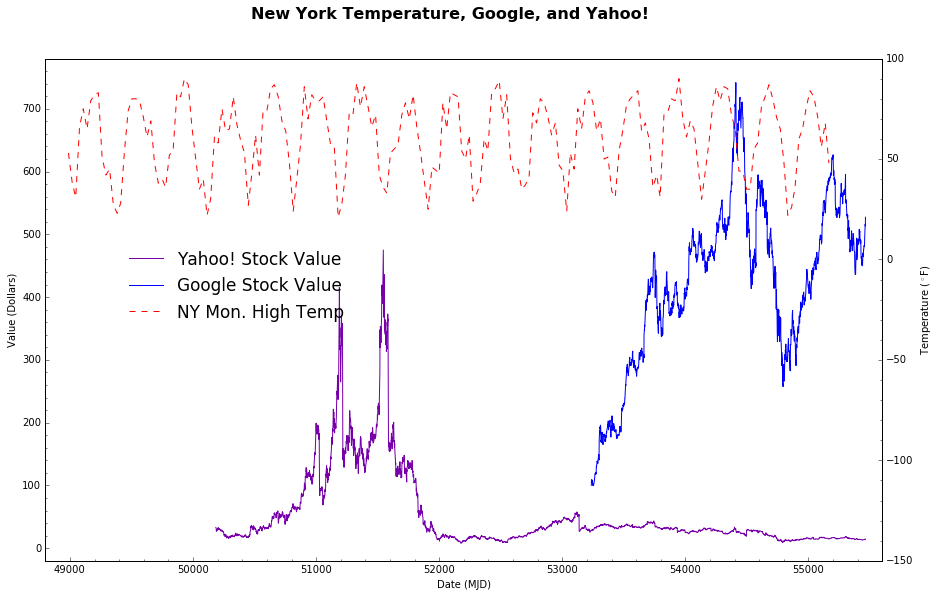

In [151]:
# Creating the figure and the first axis
fig, ax1 = plt.subplots(figsize=(15,9))

# plot stock data
yahoo, = ax1.plot(yahoo_data["date"], yahoo_data["stock_value"], 
    linestyle="-", color="#7700AA", label="Yahoo! Stock Value")
google, = ax1.plot(
    google_data["date"], google_data["stock_value"], 
    linestyle="-", color="#0000FF", label="Google Stock Value")

# set axis limits, ticks, labels
ax1.set_ylim(-20, 780)
ax1.minorticks_on()
ax1.xaxis.set_ticks_position("bottom")
ax1.set_xlabel("Date (MJD)")
ax1.set_ylabel("Value (Dollars)")

# create a second axis on top of the first axis
ax2 = ax1.twinx()
# plot the temperature data
temps, = ax2.plot(ny_temps["date"], ny_temps["max_temp"], linestyle="--", color="#FF0000", label="NY Mon. High Temp")

# set axis limits, ticks, label
ax2.set_ylim(-150, 100)
ax2.minorticks_on()
ax2.set_ylabel("Temperature ($^\circ$F)")

# set x limit -- we have to do this after all the plotting on both 
# axes so it doesn't change
ax1.set_xlim(48800, 55600)

# plot the legend
plt.figlegend([yahoo, google, temps], ["Yahoo! Stock Value", "Google Stock Value", "NY Mon. High Temp"], 
    [0.13, 0.45], fontsize=17, frameon=False, numpoints=1)
    
# plot the title
fig.suptitle("New York Temperature, Google, and Yahoo!", 
             fontsize=16, fontweight="bold")

# Part c: Brusher


In [1]:
%matplotlib osx

In [2]:
import matplotlib.pyplot as plt
import sys
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [154]:
!head hw_2_data/flowers.csv

sepal length,sepal width,petal length,petal width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [3]:
# load the flowers dataset
flowers = pd.read_table("hw_2_data/flowers.csv", sep=",").set_index("species")
flowers # (150, 4)

,sepal length,sepal width,petal length,petal width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


In [4]:
%matplotlib osx

In [110]:
import matplotlib.pyplot as plt
import sys
import matplotlib.patches as mpatches
import numpy as np


class Brusher(object):

    def __init__(self, data, colors):
        """ The following function initializes the brusher plots
        Parameters:
        data: pd.DataFrame - figure will have NxN subplots where N
                                is the number of features/columns 
        colors: np.ndarray - the colors group each row into categories 
                                accordingly
        Output: A figure which applies brushing 
                to plot many pairs of parameters 
                of a dataset in many subplots
        """
        self.data = data
        self.colors = colors
        
        # -------- Create the figure and axes ------------ #
        self.ndim = self.data.shape[1] # No. of features
        self.fig, self.axes = plt.subplots(self.ndim, self.ndim)
        
        # -------- Initialize Object's variables --------- #
        self.loc0 = None
        self.loc1 = None
        self.xy0 = None
        self.xy1 = None
        self.ax0 = None
        self.rect = None 
        self.ax_dict = {} # dictionary to store the axis keys
        self.ax_data = {} # dictionary to store the axis data

        for x, xstat in enumerate(self.data.columns):
            for y, ystat in enumerate(self.data.columns):

                # get the axis, and save the column names that
                # correspond to it
                ax = self.axes[y, x]
                self.ax_dict[str(ax)] = (xstat, ystat)
                # plot the data and save it for later in ax_data
                self.ax_data[x, y]= ax.scatter(
                    self.data[xstat], self.data[ystat])

                # set the axis limits iand ticks
                ax.set_xlim(self.data[xstat].min(), self.data[xstat].max())
                ax.set_ylim(self.data[ystat].min(), self.data[ystat].max())
                ax.xaxis.set_ticks([])
                ax.yaxis.set_ticks([])

                # plot a label on the diagonal plots
                if xstat == ystat:
                    ax.text(0.1, 0.85, xstat, transform=ax.transAxes)

        # --------------- Setup Colors of data ---------------- #
        self.update_colors()
        
        # --------------- Setup Figure Sizes ------------------ #
        self.fig.set_figwidth(10)
        self.fig.set_figheight(10)
        
        # --------------- Draw figures ----------------- #
        self.fig.show()
        self.flush()
        
        # Registering MPL events and saving IDs
        self.cids = {}
        self.cids['button_press_event'] = self.fig.canvas.mpl_connect('button_press_event', self.press)
        self.cids['button_release_event'] = self.fig.canvas.mpl_connect('button_release_event', self.release)
        #self.cids['key_press_event'] = self.fig.canvas.mpl_connect('key_press_event', self.clear)
        #self.cids['button_release_callback'] = self.fig.canvas.mpl_connect('button_release_callback', self.button_release_callback)
        self.cids['key_press_event'] = self.fig.canvas.mpl_connect('key_press_event', self.on_key)
        
    def on_key(event):
        print('you pressed', event.key, event.xdata, event.ydata)

    def flush(self):
        """
        Desciption:
        Flush std out and draw canvas - to make sure everything is written right now
        Based on: http://stackoverflow.com/questions/7127075/what-exactly-the-pythons-file-flush-is-doing
        """
        sys.stdout.flush()
        self.fig.canvas.draw()
    
    def update_colors(self, pick = None):
        """ Description:
            Update colors of the points in all subplots; 
            Non-selected Points are turned to gray when pick is not None
            
            Parameter: 
            pick: boolean numpy.ndarray
                  Points which are false are set to gray
        """
        # update colors
        colors = self.colors.copy()
        if pick is not None:
            colors[~pick] = (0, 0, 0, 0.1)
            
        # set the colors for each axis
        for (x, y), data in self.ax_data.items():
            data.set_color(colors)
            

        
    def press(self, event):
        """
        Description (Handler):
        Mouse Button Press Event
        """
                
        if not (self.rect is None):
            self.reset_fig()
            self.rect.remove()
        # ------ Handling misses --------#
        # If there's a selection already/misses: Don't do anything 
        
        
        if self.xy0 or (event.inaxes is None):
            return
        
        # save global mouse location, the axis coordinates, and axis objects
        self.loc0 = (event.x, event.y)
        self.xy0 = (event.xdata, event.ydata)
        self.ax0 = event.inaxes
        
        # create a new rectangle patch and add it to the axis
        self.rect = mpatches.Rectangle(self.xy0, 0, 0, color = 'k', alpha = 0.1)
        self.ax0.add_patch(self.rect)
        
        self.flush()
        
    def release(self, event):
        """
        Description (Handler):
        Mouse Button Release Event
        """
        # ------ Handling misses and non-selections --------#
        # If there's a selection already/misses: Don't do anything 
        if self.xy1 or (self.xy0 is None) or (event.inaxes is None):
            return
        
        # save global mouse location, the axis coordinates, and axis objects
        self.loc1 = (event.x, event.y)
        self.xy1 = (event.xdata, event.ydata)
        
        if self.ax0 != event.inaxes:
            print("Warning: INVALID SELECTON/MISS")
        else: 
            width = self.xy1[0] -self.xy0[0]
            height = self.xy1[1] - self.xy0[1]
            area = np.abs(width * height)
            if area < 0.001:
                self.reset_fig()
            else:
                # Update the wifth and heigh of rectangle of selection
                self.rect.set_width(width)
                self.rect.set_height(height)
                # Picking points we want to highlight in all subplots
                self.pick_points()
                
        self.flush()
        
        
        
    def reset_fig(self):
        """
        Description: 
        Reset the selected area once mouse is released
        """
        # ------- Removing selection --------- #
        if self.rect:
            self.rect.remove()
            self.rect = None
        
        self.update_colors()
        
        self.loc0 = None
        self.xy0 = None
        self.ax0 = None
        self.loc1 = None
        self.xy1 = None

        self.flush()

    def clear(self, event):
        """
        Description: 
        Reset the selected area once mouse is released
        """
        print('you pressed', event.key, event.xdata, event.ydata)
        
        if event.key != "d":
            return
        if (self.loc0 is None) or (self.loc1 is None):
            return
        
        # Determine if the mouse was inside the selection
        xy = np.array([self.loc0, self.loc1]).T
        xmin = xy[0].min()
        xmax = xy[0].max()
        ymin = xy[1].min()
        ymax = xy[1].max()
        inregion = ((event.x > xmin) and (event.x < xmax) and (event.y > ymin) and (event.y < ymax))
        
        # If is was selected, then rest the point
        if inregion:
            self.reset_fig()
            self.flush()
        
        self.flush()
            
    def button_release_callback(self, event):
        'whenever a mouse button is released'
        if not self.showverts:
            return
        if event.button != 1:
            return
        self._ind = None
    

    def pick_points(self):
        """Choose the points that are in the selection and update their
        colors.

        """

        # get the bounds of the selection
        xy = np.array([self.xy0, self.xy1]).T
        xmin = xy[0].min()
        xmax = xy[0].max()
        ymin = xy[1].min()
        ymax = xy[1].max()

        # get the data corresponding to the subplot we've made the
        # selection in
        xstat, ystat = self.ax_dict[str(self.ax0)]
        xdata = np.asarray(self.data[xstat])
        ydata = np.asarray(self.data[ystat])

        # determine which points to pick
        pick = ((xdata > xmin) &
                (xdata < xmax) &
                (ydata > ymin) &
                (ydata < ymax))

        # update the colors
        self.update_colors(pick=pick)

      

In [106]:
# compute the colors we want
color_map = {
    'setosa': (0.6, 0, 0, 0.4),
    'versicolor': (0, 0.6, 0, 0.4),
    'virginica': (0, 0, 0.6, 0.4)
}
colours = np.array([color_map[x] for x in flowers.index])

In [107]:
%matplotlib 

Using matplotlib backend: MacOSX


In [108]:
# display the figure
#%matplotlib notebook
Brusher(flowers, colours)

Run the above cell to see the interactive plot of the Brusher code.

In [13]:
from matplotlib import interactive

In [15]:
%matplotlib notebook